In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import yeojohnson, skew

In [3]:
df = pd.read_csv('data_science_salaries.csv')

In [4]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [5]:
df.shape

(6599, 11)

In [6]:
df.columns 

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

# DATA CLEANING

In [7]:
df.isna().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

it looks like the data has no missing values .
  Now, let us have a look at the data type of each column  

In [8]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

###### looks like there is no need to change a type of a column since the columns which are numerical and require such measures of central tendency andso on are int type

##### The first step in comparing prices over different years is to designate a base year. The base year serves as a reference point and is critical for adjusting prices to a common standard. Choosing an appropriate base year is essential, as it significantly influences the accuracy of the inflation adjustments. Typically, economists and analysts select a year with stable economic conditions and minimal inflation as the base year

In [9]:
# taking 2023 As the base year

In [10]:
us_inflation_rate = {2020: 0.0123, 2021: 0.0470, 2022: 0.065, 2023:0.034 } 
global_inflation_rate = {2020: 0.0123, 2021: 0.0470, 2022: 0.065, 2023: 0.034}

def inflation(row):
    year = row['work_year']
    currency = row['salary_currency']
    salary = row['salary_in_usd']
    
    if year == 2024:
        return salary
    else:
        if currency == 'USD':
            inflation_rate = us_inflation_rate[year]
        else:
            inflation_rate = global_inflation_rate[year]

        adjusted_salary = salary * (1 + inflation_rate)
        return adjusted_salary


In [11]:
df['adjasted_salary'] = df.apply(inflation, axis=1)  # appply the function to each row

# What are the most common job titles in the data science field?

In [12]:
pd.DataFrame(df['job_title'].value_counts())

,count
job_title,
Data Engineer,1307
Data Scientist,1243
Data Analyst,910
Machine Learning Engineer,629
Analytics Engineer,246
...,...
Deep Learning Researcher,1
Power BI Developer,1
Marketing Data Scientist,1


###### as we may see, from the given dataframe that the availaible job positions are quit a lot which is not the perfect case for my analysis, since I am looking for visualising the relation between almost all the jobs and the corresponding mean salary

In [13]:
len(df['job_title'].unique())

132

In [14]:
# show all the jobs titles so i can make categories from them
pd.set_option('display.max_rows', None)
df['job_title']

0                                  Data Engineer
1                                  Data Engineer
2                                 Data Scientist
3                                 Data Scientist
4                                   BI Developer
5                                   BI Developer
6                               Research Analyst
7                               Research Analyst
8                                  Data Engineer
9                                  Data Engineer
10               Business Intelligence Developer
11               Business Intelligence Developer
12                                Data Scientist
13                                Data Scientist
14                                 Data Engineer
15                                 Data Engineer
16                                Data Scientist
17                                Data Scientist
18                                Data Scientist
19                                Data Scientist
20                  

###### by categorizing them into some 5 sub categories, we can create a new column correponding to the category

In [15]:
data_engineering = [
    'Data Engineer', 'Data Architect', 'Data Modeler', 'Data Manager', 'Data Lead', 'Data Quality Analyst', 
    'Data Specialist', 'Data Operations Engineer', 'Data Product Manager', 'Data Integration Engineer', 
    'Data Infrastructure Engineer', 'Data Visualization Specialist', 'Data Ops Engineer', 'Data DevOps Engineer', 
    'Data Quality Manager', 'Data Strategy Manager', 'Consultant Data Engineer', 'Staff Data Engineer', 
    'Software Data Engineer', 'Cloud Data Engineer', 'Cloud Database Engineer', 'Cloud Data Architect', 
    'Azure Data Engineer', 'AWS Data Architect', 'ETL Engineer', 'Compliance Data Analyst', 'Marketing Data Engineer', 
    'Power BI Developer'
]

data_science = [
    'Data Scientist', 'Research Scientist', 'Applied Scientist', 'Principal Data Scientist', 
    'Lead Data Scientist', 'Staff Data Scientist'
]

machine_learning = [
    'Machine Learning Engineer', 'Machine Learning Specialist', 'Deep Learning Engineer', 'MLOps Engineer', 
    'Machine Learning Operations Engineer', 'AI Engineer', 'AI Scientist', 'AI Developer', 'AI Architect', 
    'AI Programmer', 'AI Research Engineer', 'Managing Director Data Science', 'Head of Machine Learning', 
    'Lead Machine Learning Engineer', 'Machine Learning Manager', 'Machine Learning Modeler', 
    'Autonomous Vehicle Technician'
]

data_analysis_bi = [
    'Data Analyst', 'Business Intelligence Analyst', 'BI Analyst', 'Financial Data Analyst', 'Product Data Analyst', 
    'Marketing Data Analyst', 'Sales Data Analyst', 'Business Data Analyst', 'Insight Analyst', 
    'Business Intelligence Manager', 'Business Intelligence Specialist', 'Power BI Developer'
]



In [16]:
def categorize_job_title(job_title):
    if job_title in data_engineering:
        return 'Data Engineering'
    elif job_title in data_science:
        return 'Data Science'
    elif job_title in machine_learning:
        return 'Machine Learning'
    elif job_title in data_analysis_bi:
        return 'Data Analysis & Business Intelligence'
    else:
        return 'Other'

In [17]:
df['job_category'] = df['job_title'].apply(categorize_job_title)

# most dominant categories

In [18]:
dominance_percentage = (df['job_category'].value_counts(normalize= True)) * 100

In [19]:
dominance_percentage.index

Index(['Data Engineering', 'Data Science', 'Other',
       'Data Analysis & Business Intelligence', 'Machine Learning'],
      dtype='object', name='job_category')

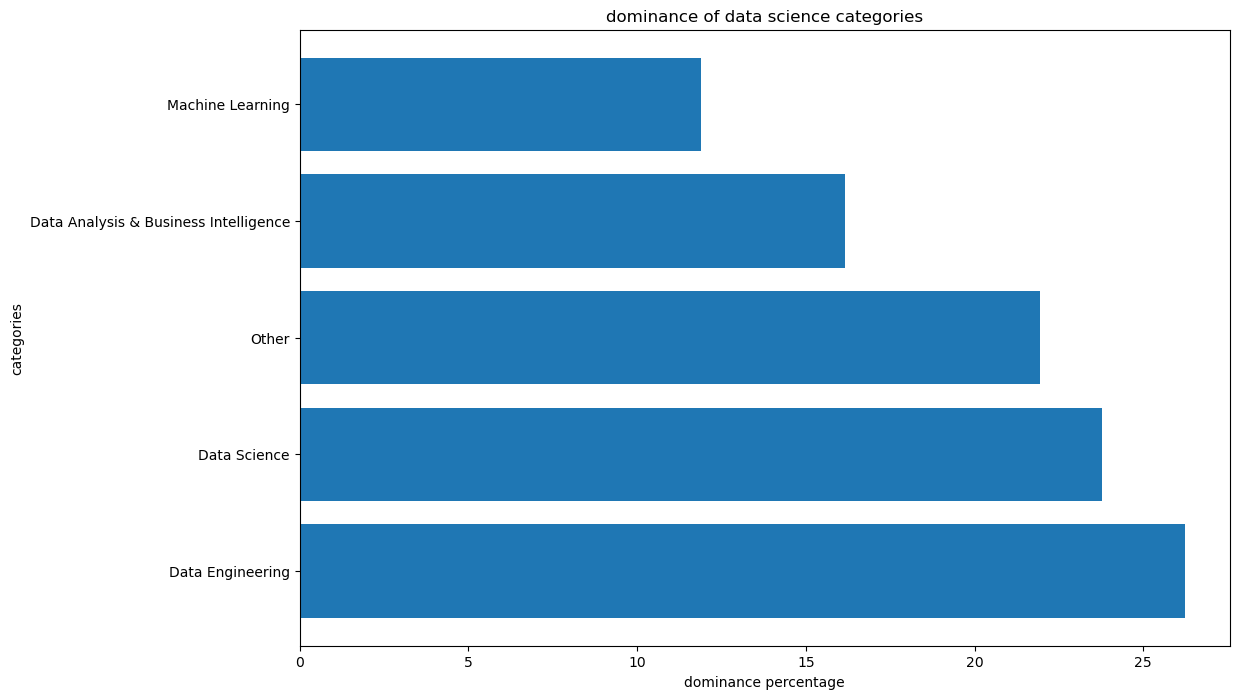

In [20]:
plt.subplots(figsize=(12, 8))
plt.barh(dominance_percentage.index , dominance_percentage.values)
plt.title('dominance of data science categories')
plt.xlabel('dominance percentage')
plt.ylabel('categories')
plt.show()

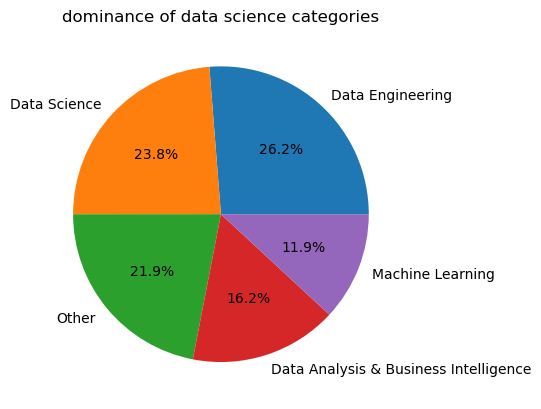

In [21]:
plt.pie(df['job_category'].value_counts(), labels = dominance_percentage.index, autopct='%1.1f%%')
plt.title('dominance of data science categories')
plt.show()


# what makes both Data Science and Data Engineering more dominant , is it salary ?

 ##  distribution of salaries per category 

In [22]:
categories_grouping = df.groupby('job_category')

In [23]:
descrive_salaries = categories_grouping.adjasted_salary.describe().sort_values(by = 'mean', ascending = False)

In [24]:
descrive_salaries.T

job_category,Machine Learning,Data Science,Other,Data Engineering,Data Analysis & Business Intelligence
count,785.000000,1568.000000,1448.000000,1732.000000,1066.000000
mean,176618.511751,161251.117342,157201.022958,148737.358925,110852.481883
std,78881.147237,71354.048830,82245.564476,66394.371771,49612.056403
min,18901.491000,16544.000000,15184.500000,17603.850000,15975.000000
25%,126871.800000,113987.625000,102219.172000,99264.000000,75016.250000
50%,170610.000000,156098.327000,148600.981000,140803.650000,106366.875000
75%,223277.824000,204358.800000,198345.757500,189163.500000,138450.000000
max,775500.000000,775500.000000,775500.000000,775500.000000,458979.855000


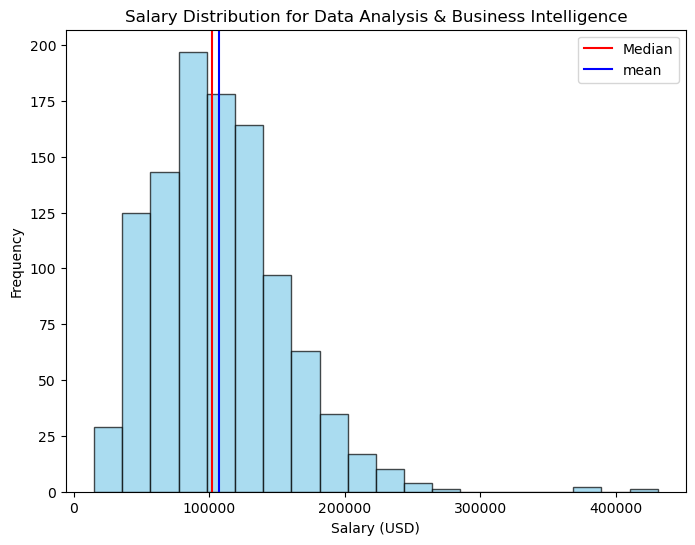

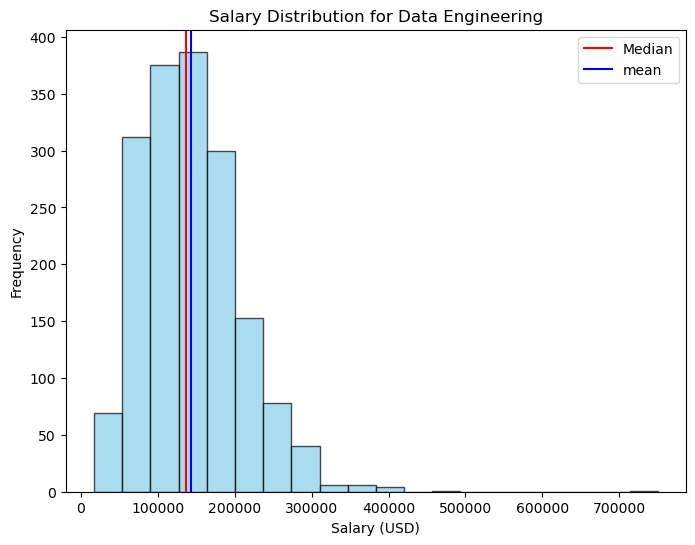

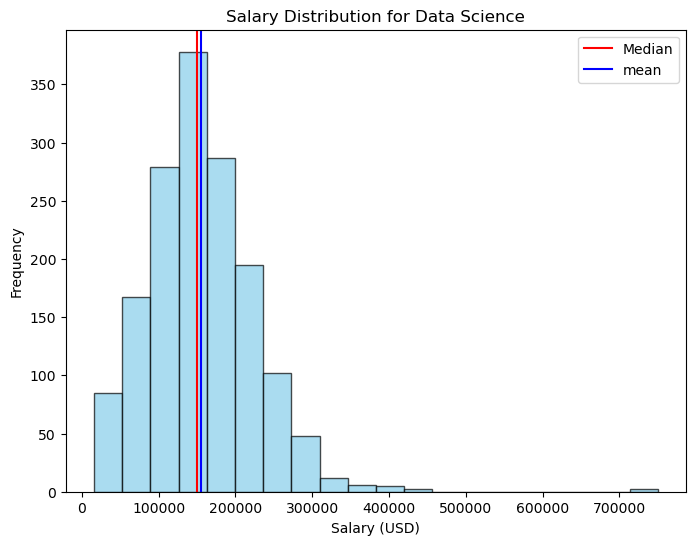

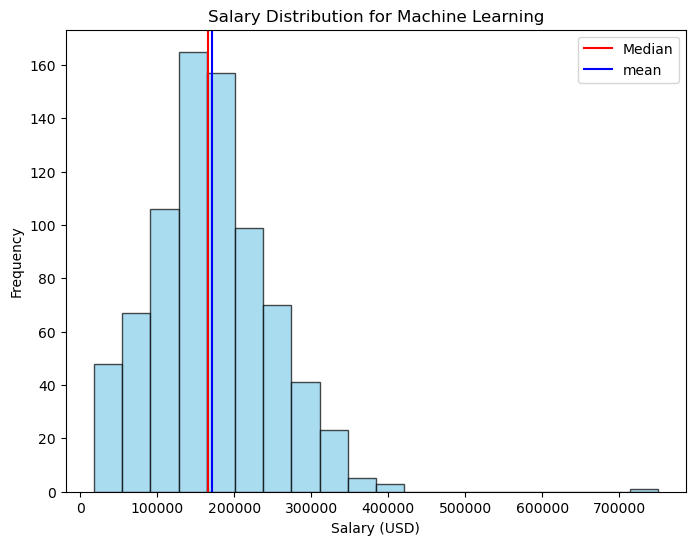

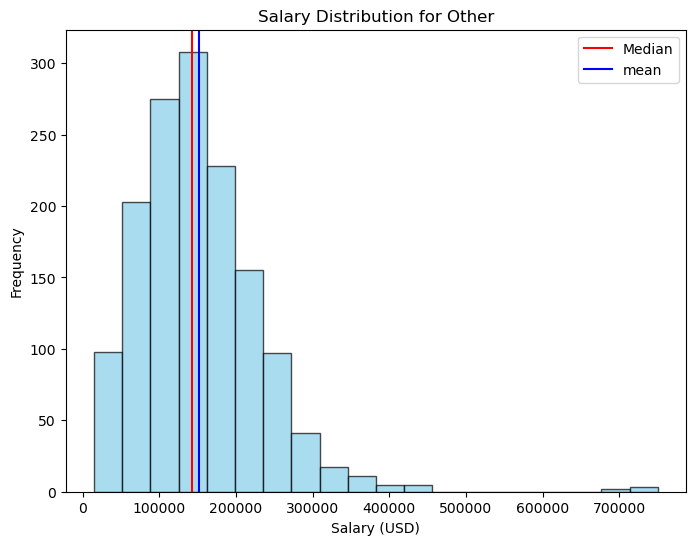

In [25]:
for category, data in categories_grouping:
    median = data['salary_in_usd'].median()
    mean = data['salary_in_usd'].mean()
    plt.figure(figsize=(8, 6))
    plt.hist(data['salary_in_usd'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(median, color= 'r', linewidth = 1.5, label = 'Median')
    plt.axvline(mean, color= 'b', linewidth = 1.5, label = 'mean')
    plt.xlabel('Salary (USD)')
    plt.ylabel('Frequency')
    plt.title(f'Salary Distribution for {category}')
    plt.legend()
    plt.show()

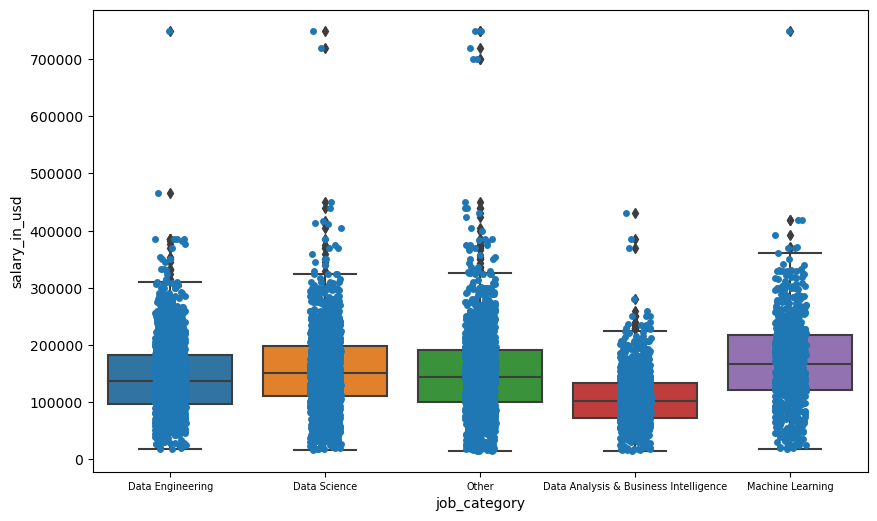

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='job_category', y='salary_in_usd', data=df)
sns.stripplot(x='job_category', y='salary_in_usd', data=df)
plt.xticks(fontsize=7)  # Adjust font size of x-axis labels
plt.show()

##### Machine learning sector has the highest earnings although it is the least dominant, However, Data analysis and BI has the lowest

# How do salaries vary based on experience level?

In [27]:
emp_type_salaries = df.groupby('employment_type')['salary_in_usd'].mean()
emp_type_salaries

employment_type
Contract     117109.368421
Freelance     51923.166667
Full-time    146034.998932
Part-time     55291.062500
Name: salary_in_usd, dtype: float64

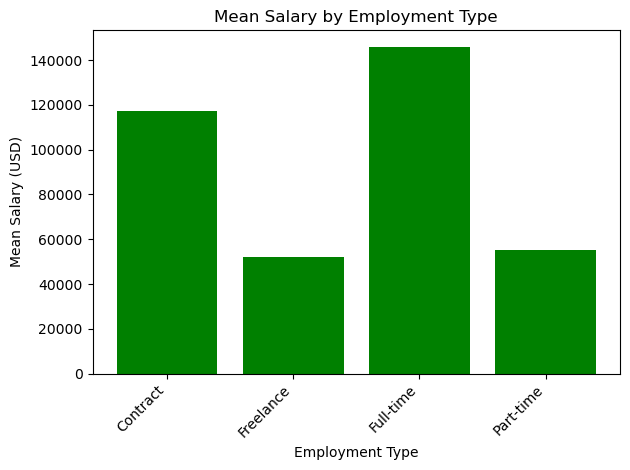

In [28]:
employment_type = emp_type_salaries.index
mean = emp_type_salaries.values


plt.bar(employment_type, mean, color='green')

plt.xlabel('Employment Type')
plt.ylabel('Mean Salary (USD)')
plt.title('Mean Salary by Employment Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [29]:
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size,adjasted_salary,job_category
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium,148100.0,Data Engineering
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium,98700.0,Data Engineering
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium,140032.0,Data Science
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium,100022.0,Data Science
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium,120000.0,Other


#### as expected, Full time employees are way more paid than others

# does the salary vary depending on the experience level of the employee

In [30]:
salaries_mean_median = df.groupby('experience_level')\
        .agg({'salary_in_usd': ['mean', 'median']})\
        .sort_values(by = ('salary_in_usd', 'mean'), ascending = False)

In [31]:
mean = salaries_mean_median[('salary_in_usd', 'mean')]
experience_groups = salaries_mean_median.index

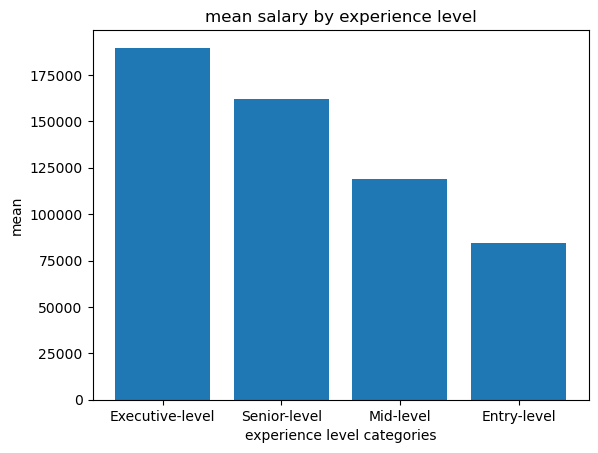

In [32]:
plt.bar(experience_groups, mean)
plt.title('mean salary by experience level')
plt.ylabel('mean')
plt.xlabel('experience level categories')
plt.show()

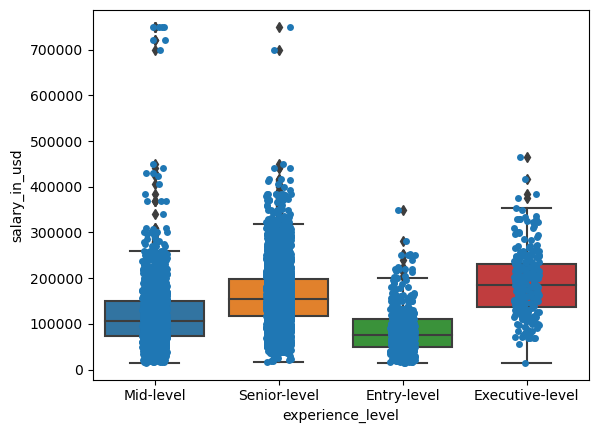

In [33]:
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
sns.stripplot(x='experience_level', y='salary_in_usd', data=df)
plt.show()


###### we can tell that the Executive-level employees definetly earns the most such that it has the highest mean (we can take the average into consideration since we do not have as many outliers), also that the salary of 50% of employees with the latter level ranges between 140000 and 230000 dollars

# What is the distribution of salaries across different regions and company sizes?

In [34]:
country_salary_distribution = df.groupby('company_location')['salary_in_usd'].describe()

In [35]:
country_salary_distribution.shape[0]
# Number of different regions we have 

75

In [36]:
country_salary_distribution.index

Index(['Algeria', 'Andorra', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bahamas', 'Belgium', 'Bosnia and Herzegovina', 'Brazil', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia', 'Croatia',
       'Czech Republic', 'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland',
       'France', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Honduras',
       'Hong Kong', 'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Japan', 'Kenya', 'Latvia', 'Lebanon', 'Lithuania',
       'Luxembourg', 'Malaysia', 'Malta', 'Mauritius', 'Mexico', 'Moldova',
       'Netherlands', 'New Zealand', 'Nigeria', 'Norway', 'Pakistan',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Romania',
       'Russia', 'Saudi Arabia', 'Singapore', 'Slovenia', 'South Africa',
       'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States',
       'Vi

In [37]:
# Define countries by continent
africa = ['Algeria', 'Central African Republic', 'Ghana', 'Egypt', 'Kenya', 'Mauritius', 'Nigeria', 'South Africa']
europe = ['Andorra', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom']
south_america = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador']
asia = ['Armenia', 'China', 'Hong Kong', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Lebanon', 'Malaysia', 'Pakistan', 'Philippines', 'Qatar', 'Saudi Arabia', 'Singapore', 'South Korea', 'Thailand', 'Turkey', 'United Arab Emirates', 'Vietnam']
australia = ['Australia', 'New Zealand']
north_america = ['Bahamas', 'Canada', 'Honduras', 'Mexico', 'Puerto Rico', 'United States']

In [38]:
def categorize_continents(column):
     if column in africa:
        return 'Africa'
     elif column in europe:
        return 'Europe'
     elif column in south_america:
        return 'South America'
     elif column in asia:
        return 'Asia'
     elif column in australia:
        return 'Australia'
     else:
        return 'North America'
    

In [39]:
df['company_continent'] = df['company_location'].apply(categorize_continents)

In [40]:
attr_conti = df.groupby('company_continent')['salary_in_usd'].describe()\
               .sort_values(by = 'count', ascending = False) \
            .head(3)
           

<BarContainer object of 3 artists>

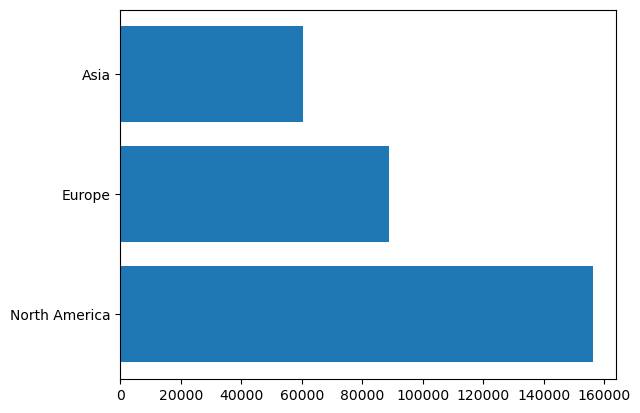

In [41]:
plt.barh( attr_conti.index, attr_conti['mean'].values)

WE CAN CHECK THAT BY

In [42]:
df.loc[df['company_continent'] == 'North America']['company_location'].value_counts()

company_location
United States    5354
Canada            243
Mexico             11
Puerto Rico         4
Bahamas             1
Honduras            1
Name: count, dtype: int64

###### NORTH AMERICA IS AN ATTRACTIVE REGION FOR DATA SCIENCE POSITIONS in particular USA

# Mean Salary by Work Models for Different Employment Types in the US

In [49]:
data = pd.DataFrame(df.loc[(df['company_location'] == 'United States') , ['work_models', 'employment_type' , 'salary_in_usd']])        

In [50]:
 grouped_df = data \
        .groupby(['employment_type', 'work_models'] )['salary_in_usd'].mean()\
        .sort_values(ascending = False)
grouped_df = pd.DataFrame(grouped_df)
grouped_df = grouped_df.pivot_table(index='employment_type', columns='work_models', values='salary_in_usd')

In [51]:
grouped_df = grouped_df.fillna(0)

In [52]:
types = grouped_df.index
remote = grouped_df.values[:, 2]
on_site = grouped_df.values[:, 1]
hybrid = grouped_df.values[:, 0]

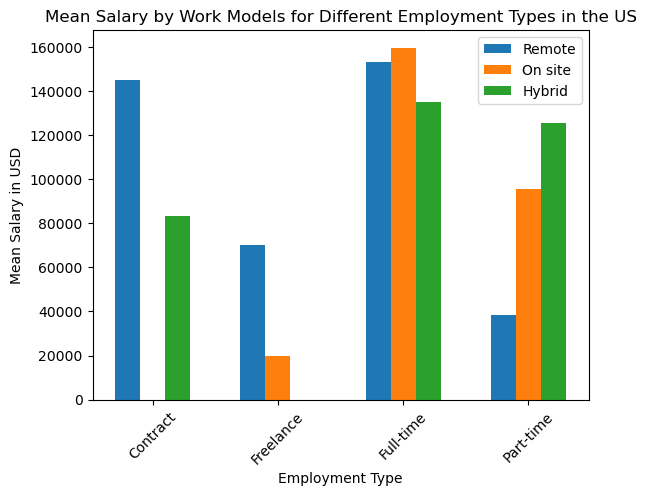

In [53]:
width = 0.2
x = np.arange(len(types))
plt.bar(x-width, remote, label = 'Remote', width = width)
plt.bar(x, on_site, label = 'On site', width = width)
plt.bar(x+width, hybrid, label = 'Hybrid', width = width)
plt.xlabel('Employment Type')
plt.ylabel('Mean Salary in USD')
plt.title('Mean Salary by Work Models for Different Employment Types in the US')
plt.legend()
plt.xticks(x, types, rotation=45) 
plt.show()

Since , I am interested in this field, I was just curious about what are the highest paying and most commun employment types and work methods in the US 

as expected, full time employees earn the most overall regardless of the work model in the US